In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tabulate import tabulate
import datetime

In [ ]:
retanalysis = pd.read_csv('/content/retaildata.csv')

In [ ]:
retanalysis.shape

(541909, 8)

In [ ]:
retanalysis.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retanalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The .info gives a detail aspect of the dataset which includes the datatypes , the columns and the non null counts

In [ ]:
retanalysis.shape

(541909, 8)

In [ ]:
retanalysis.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The .describe function gives the mean,minimum,percentage values, the maximum and the standard deviation of the numerical coulmns in the dataset.

In [ ]:
retanalysis.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
Categorical_columns = retanalysis.select_dtypes(include=['object']).columns

In [ ]:
Categorical_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [ ]:
retanalysis.duplicated().sum()

np.int64(5268)

In [ ]:
#drop the duplicates
retanalysis.drop_duplicates(inplace=True)

In [ ]:
retanalysis.duplicated().sum()

np.int64(0)

In [ ]:
#Drop the Description and CustomerID columns
retanalysis.dropna(subset=['Description', 'CustomerID'], inplace=True)

In [ ]:
retanalysis.shape

(401604, 8)

In [ ]:
retanalysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
retanalysis.shape

(401604, 8)

In [ ]:
retanalysis['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [ ]:
C_retanalysis = retanalysis[retanalysis['Quantity'] < 0]

In [ ]:
C_retanalysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
#C_retanalysis1 = retanalysis[retanalysis['Quantity'] > 0]
#C_retanalysis1

In [ ]:
#C_retanalysis = retanalysis[retanalysis['InvoiceNo'].str.startswith('C', na=False)]

In [ ]:
C_retanalysis.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


GIve the .describe of the C_ret

In [ ]:
C_retanalysis.shape

(8872, 8)

In [ ]:
len(C_retanalysis)

8872

In [ ]:
PerC = (len(C_retanalysis) / len(retanalysis)) * 100

In [ ]:
PerC

2.209141343213713

In [ ]:
S_uniq = retanalysis['StockCode'].unique()
S_uniq

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [ ]:
retanalysis['StockCode']

,StockCode
0,85123A
1,71053
2,84406B
3,84029G
4,84029E
...,...
541904,22613
541905,22899
541906,23254
541907,23255


In [ ]:
retanalysis.groupby(retanalysis['StockCode']).count()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
10002,49,49,49,49,49,49,49
10080,21,21,21,21,21,21,21
10120,29,29,29,29,29,29,29
10123C,3,3,3,3,3,3,3
10124A,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
D,77,77,77,77,77,77,77
DOT,16,16,16,16,16,16,16
M,460,460,460,460,460,460,460


In [ ]:
retanalysis.groupby(['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False)

,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
85099B,JUMBO BAG RED RETROSPOT,44963
84879,ASSORTED COLOUR BIRD ORNAMENT,35215
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34128
21212,PACK OF 72 RETROSPOT CAKE CASES,33386
...,...,...
21144,PINK POODLE HANGING DECORATION,-12
CRUK,CRUK Commission,-16
21645,ASSORTED TUTTI FRUTTI ROUND BOX,-24


With the result above the item with the stockcode 84077 has the highest sale amongst the other products which shows a high demand for it therefore the CEO should purchase more of that product.

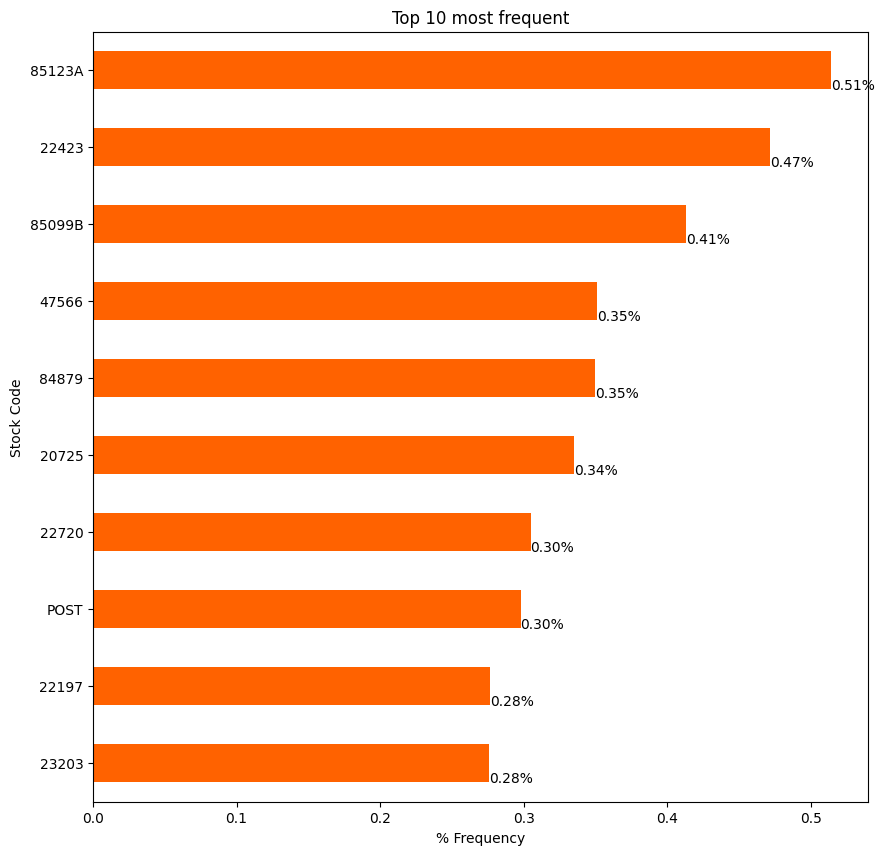

In [ ]:
# Top 10 most frequent items on store in percentage
top_10_s = retanalysis["StockCode"].value_counts(normalize=True).head(10) * 100
plt.figure(figsize=(10, 10))
top_10_s.plot(kind='barh', color= "#ff6200")

for index, value in enumerate(top_10_s):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title("Top 10 most frequent")
plt.xlabel("% Frequency")
plt.ylabel('Stock Code')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top10 = retanalysis['StockCode'].value_counts().head(10)

In [ ]:
top10

,count
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
20725,1346
22720,1224
POST,1196
22197,1110


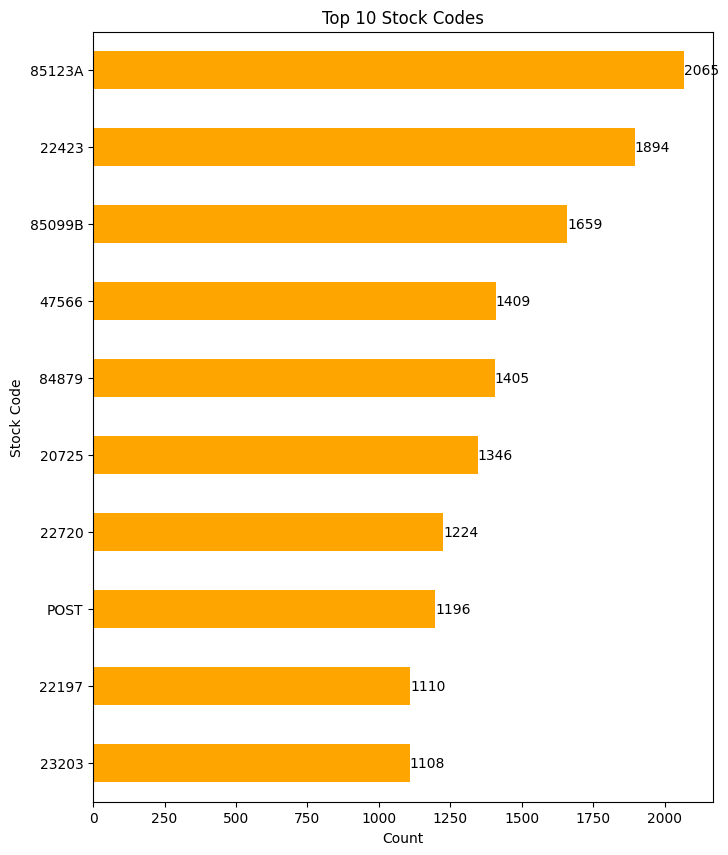

In [ ]:
plt.figure(figsize=(8, 10))
top10.plot(kind='barh', color = 'Orange')
plt.title('Top 10 Stock Codes')
plt.xlabel('Count')
plt.ylabel('Stock Code')
plt.gca().invert_yaxis()


for index, value in enumerate(top10):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()

In [ ]:
retanalysis['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
retanalysis['Country'].nunique()

37

In [ ]:
retanalysis['Country'].value_counts()

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [ ]:
# identifying unspecified country's output
retanalysis[retanalysis['Country']=='Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,8/22/2011 13:32,16.95,14265.0,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,8/22/2011 13:32,1.69,14265.0,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,8/22/2011 13:32,8.25,14265.0,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,8/22/2011 13:32,6.65,14265.0,Unspecified


In [ ]:
unspecified = retanalysis[retanalysis['Country']=='Unspecified']
unspecified

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,8/22/2011 13:32,16.95,14265.0,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,8/22/2011 13:32,1.69,14265.0,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,8/22/2011 13:32,8.25,14265.0,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,8/22/2011 13:32,6.65,14265.0,Unspecified


In [ ]:
del unspecified['Country']

In [ ]:
retanalysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
unspecified.shape

(241, 7)

In [ ]:
# identify unique description
retanalysis['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
unique_desc = retanalysis['Description'].unique()
unique_desc

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
Retanalysis = unique_desc

In [ ]:
Retanalysis = [desc for desc in Retanalysis if any(char.islower() for char in  desc)]

In [ ]:
Retanalysis

['Discount',
 'BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'Manual',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'Bank Charges',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'CRUK Commission',
 'High Resolution Image']

In [ ]:
#Retanalysis = [desc for desc in Retanalysis if any(char.isupper() for char in  desc)]
#Retanalysis

In [ ]:
# drop bank charges, next day carriage,High Resolution Image
retanalysis = retanalysis[[desc for desc in retanalysis if desc not in ['Bank Charges', 'Next Day Carriage', 'High Resolution Image']]]
retanalysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
retanalysis.shape

(401604, 8)

In [ ]:
retanalysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Convert 'InvoiceDate' to datetime
retanalysis['InvoiceDate'] = pd.to_datetime(retanalysis['InvoiceDate'])

# Extract month
retanalysis['InvoiceMonth'] = retanalysis['InvoiceDate'].dt.month

retanalysis.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [ ]:
retanalysis.shape

(401604, 9)

In [ ]:
ret = retanalysis[retanalysis['UnitPrice'] == 0]
ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,12
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,1
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,1
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,1
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,2
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,3
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,3
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,4


In [ ]:
outlier_stockcode = [code for code in S_uniq if sum(c.isdigit()for c in str(code)) in (0,1)]
outlier_stockcode


['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [ ]:
desc_30 = retanalysis['Description'].value_counts().head(30)
desc_30

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1099


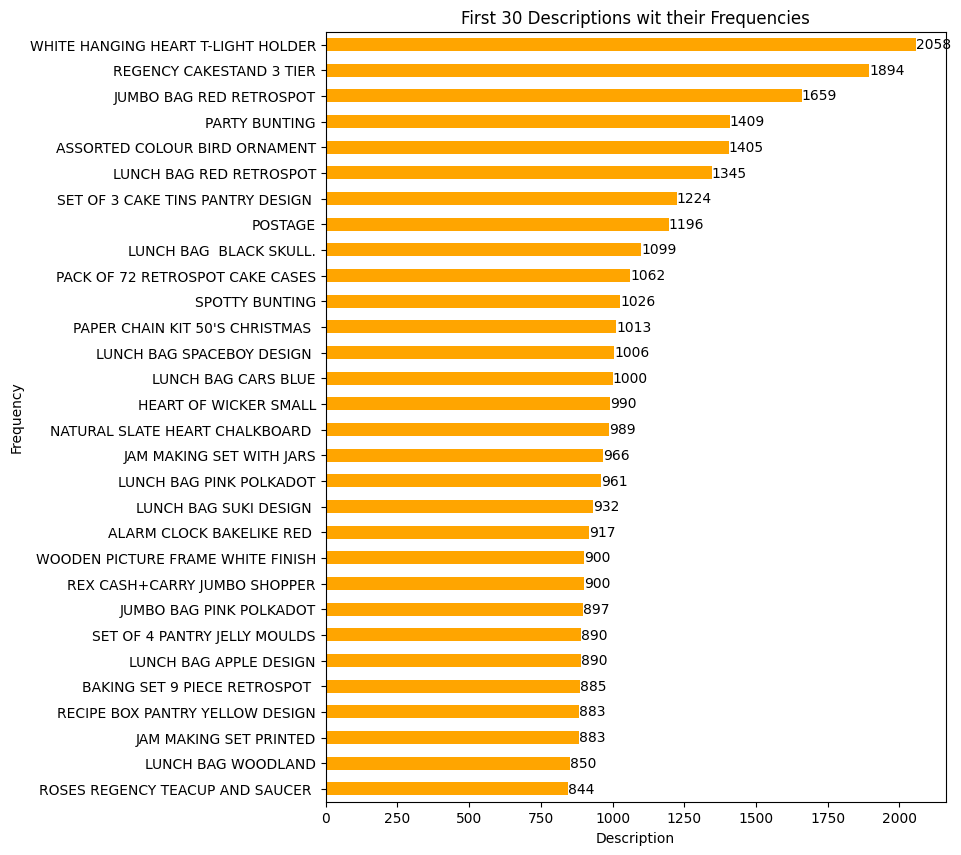

In [ ]:
plt.figure(figsize=(8, 10))
desc_30.plot(kind='barh', color = 'Orange')
plt.title('First 30 Descriptions wit their Frequencies')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.gca().invert_yaxis()


for index, value in enumerate(desc_30):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()

In [ ]:
# remove all anomalies present in your dataset
from os import remove
remove_outlier = retanalysis[[desc for desc in retanalysis if desc not in ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']]]
remove_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


In [ ]:
remove_outlier = retanalysis[[desc for desc in retanalysis if desc not in ['outlier_stockcode']]]
remove_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


In [ ]:

retanalysis.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [ ]:
retanalysis[retanalysis['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,12
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12


In [ ]:
#retanalysis.query('Description==WHITE HANGING HEART T-LIGHT HOLDER')
retanalysis.query("Description == 'WHITE HANGING HEART T-LIGHT HOLDER'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,12
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,12
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,12
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
537291,581246,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-12-08 10:59:00,2.95,15453.0,United Kingdom,12
537326,581253,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-12-08 11:15:00,2.95,16891.0,United Kingdom,12
537852,581356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 12:28:00,2.95,17830.0,United Kingdom,12
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom,12


In [ ]:
retanalysis['Transactional Status'] = retanalysis['Quantity'].apply(lambda C: 'Cancelled' if C < 0 else 'Complete')

retanalysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Transactional Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Complete
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Complete
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Complete
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Complete
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Complete
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Complete
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Complete
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Complete
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Complete


In [ ]:
retanalysis['Transactional Status'].value_counts()

,count
Transactional Status,
Complete,392732
Cancelled,8872


In [ ]:
retanalysis.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Transactional Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Complete
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Complete
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Complete
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Complete
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Complete
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,12,Complete
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,12,Complete
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,Complete
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,Complete
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,12,Complete


<Axes: ylabel='UnitPrice'>

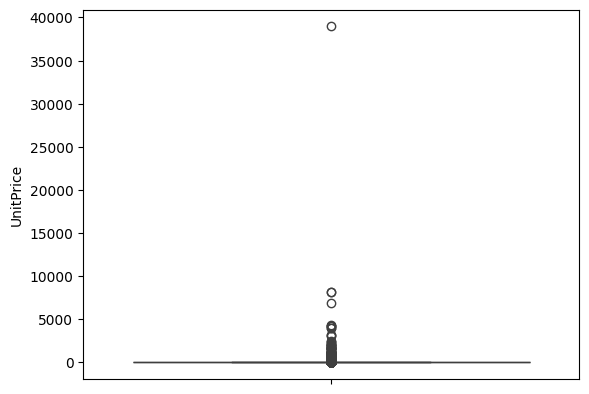

In [ ]:
sns.boxplot(retanalysis['UnitPrice'])

<Axes: xlabel='Quantity'>

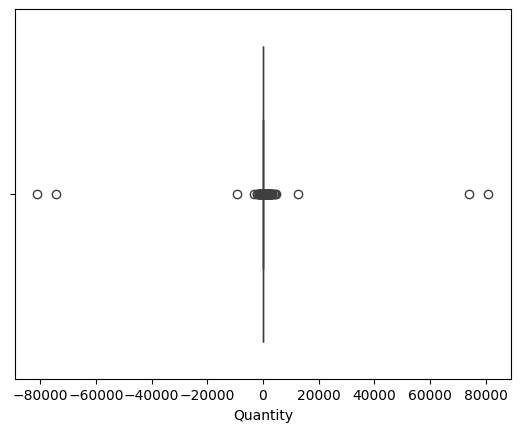

In [ ]:
sns.boxplot(x=retanalysis['Quantity'])

In [ ]:
Q1 = retanalysis['Quantity'].quantile(0.25)
Q3 = retanalysis['Quantity'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10.0


In [ ]:
Q1 = retanalysis['UnitPrice'].quantile(0.25)
Q3 = retanalysis['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.5


In [ ]:
#Q1 = retanalysis.quantile(0.25)
#Q3 = retanalysis.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [ ]:
target_Czech_Republic = retanalysis[retanalysis['Country'] == 'Czech Republic']
target_Czech_Republic

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Transactional Status
103598,545072,22930,BAKING MOULD HEART MILK CHOCOLATE,18,2011-02-28 08:43:00,2.55,12781.0,Czech Republic,2,Complete
103599,545072,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2011-02-28 08:43:00,0.65,12781.0,Czech Republic,2,Complete
103600,545072,22216,T-LIGHT HOLDER WHITE LACE,24,2011-02-28 08:43:00,0.85,12781.0,Czech Republic,2,Complete
103601,545072,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-02-28 08:43:00,1.25,12781.0,Czech Republic,2,Complete
103602,545072,22231,JIGSAW TREE WITH BIRDHOUSE,36,2011-02-28 08:43:00,1.45,12781.0,Czech Republic,2,Complete
103603,545072,22250,DECORATION BUTTERFLY MAGIC GARDEN,32,2011-02-28 08:43:00,0.85,12781.0,Czech Republic,2,Complete
103604,545072,84459A,PINK METAL CHICKEN HEART,24,2011-02-28 08:43:00,1.49,12781.0,Czech Republic,2,Complete
103605,545072,20972,PINK CREAM FELT CRAFT TRINKET BOX,24,2011-02-28 08:43:00,1.25,12781.0,Czech Republic,2,Complete
103606,545072,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2011-02-28 08:43:00,2.95,12781.0,Czech Republic,2,Complete
103607,545072,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,12,2011-02-28 08:43:00,4.25,12781.0,Czech Republic,2,Complete


In [ ]:
target_Czech_Republic.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Transactional Status
103598,545072,22930,BAKING MOULD HEART MILK CHOCOLATE,18,2011-02-28 08:43:00,2.55,12781.0,Czech Republic,2,Complete
103599,545072,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2011-02-28 08:43:00,0.65,12781.0,Czech Republic,2,Complete
103600,545072,22216,T-LIGHT HOLDER WHITE LACE,24,2011-02-28 08:43:00,0.85,12781.0,Czech Republic,2,Complete
103601,545072,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-02-28 08:43:00,1.25,12781.0,Czech Republic,2,Complete
103602,545072,22231,JIGSAW TREE WITH BIRDHOUSE,36,2011-02-28 08:43:00,1.45,12781.0,Czech Republic,2,Complete
103603,545072,22250,DECORATION BUTTERFLY MAGIC GARDEN,32,2011-02-28 08:43:00,0.85,12781.0,Czech Republic,2,Complete
103604,545072,84459A,PINK METAL CHICKEN HEART,24,2011-02-28 08:43:00,1.49,12781.0,Czech Republic,2,Complete
103605,545072,20972,PINK CREAM FELT CRAFT TRINKET BOX,24,2011-02-28 08:43:00,1.25,12781.0,Czech Republic,2,Complete
103606,545072,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2011-02-28 08:43:00,2.95,12781.0,Czech Republic,2,Complete
103607,545072,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,12,2011-02-28 08:43:00,4.25,12781.0,Czech Republic,2,Complete


In [ ]:
target_Czech_Republic["Year"] = target_Czech_Republic["InvoiceDate"].dt.year
target_Czech_Republic

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Transactional Status,Year
103598,545072,22930,BAKING MOULD HEART MILK CHOCOLATE,18,2011-02-28 08:43:00,2.55,12781.0,Czech Republic,2,Complete,2011
103599,545072,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2011-02-28 08:43:00,0.65,12781.0,Czech Republic,2,Complete,2011
103600,545072,22216,T-LIGHT HOLDER WHITE LACE,24,2011-02-28 08:43:00,0.85,12781.0,Czech Republic,2,Complete,2011
103601,545072,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-02-28 08:43:00,1.25,12781.0,Czech Republic,2,Complete,2011
103602,545072,22231,JIGSAW TREE WITH BIRDHOUSE,36,2011-02-28 08:43:00,1.45,12781.0,Czech Republic,2,Complete,2011
103603,545072,22250,DECORATION BUTTERFLY MAGIC GARDEN,32,2011-02-28 08:43:00,0.85,12781.0,Czech Republic,2,Complete,2011
103604,545072,84459A,PINK METAL CHICKEN HEART,24,2011-02-28 08:43:00,1.49,12781.0,Czech Republic,2,Complete,2011
103605,545072,20972,PINK CREAM FELT CRAFT TRINKET BOX,24,2011-02-28 08:43:00,1.25,12781.0,Czech Republic,2,Complete,2011
103606,545072,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2011-02-28 08:43:00,2.95,12781.0,Czech Republic,2,Complete,2011
103607,545072,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,12,2011-02-28 08:43:00,4.25,12781.0,Czech Republic,2,Complete,2011


In [83]:
QuantityPerDescription = target_Czech_Republic.groupby(['Description','CustomerID','Year','InvoiceMonth','StockCode'])['Quantity'].sum()
QuantityPerDescription

,,,,,Quantity
Description,CustomerID,Year,InvoiceMonth,StockCode,
12 PENCILS SMALL TUBE RED RETROSPOT,12781.0,2011,10,20975,24
12 PENCILS SMALL TUBE SKULL,12781.0,2011,10,20974,24
3 HOOK HANGER MAGIC GARDEN,12781.0,2011,2,22244,12
ASSORTED COLOUR LIZARD SUCTION HOOK,12781.0,2011,10,47421,24
BAKING MOULD HEART MILK CHOCOLATE,12781.0,2011,2,22930,18
CHRISTMAS TABLE SILVER CANDLE SPIKE,12781.0,2011,10,23271,48
COLOUR GLASS T-LIGHT HOLDER HANGING,12781.0,2011,2,84755,48
CREAM FELT EASTER EGG BASKET,12781.0,2011,2,85206A,24
DECORATION BUTTERFLY MAGIC GARDEN,12781.0,2011,2,22250,32
